<a href="https://colab.research.google.com/github/Fentahun60/Fentahun/blob/main/Safewater_access.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your CSV file
csv_file_path = '/content/drive/MyDrive/Safewater_CSV_all_new_final.csv'

# Read the CSV file into a DataFrame
try:
    df = pd.read_csv(csv_file_path)
    # Display the head of the DataFrame
    print("DataFrame head:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found. Please ensure the path is correct and your Drive is mounted.")
except Exception as e:
    print(f"An error occurred while reading the CSV: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-2434065071.py:12: DtypeWarning: Columns (24,25,26,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


DataFrame head:
        case_id country_code_phase  cluster_no  household_no  \
0      00010001                AO7           1             1   
1      00010002                AO7           1             2   
2      00010003                AO7           1             3   
3      00010004                AO7           1             4   
4      00010005                AO7           1             5   

   hh_sample_weight  interview_year  Number_household_members  \
0           1203191            2016                         7   
1           1203191            2016                         9   
2           1203191            2016                         7   
3           1203191            2016                         7   
4           1203191            2016                         2   

   Number_children_under5 Residence  total_adults  ... Household_head_age  \
0                       1     rural           3.0  ...                 39   
1                       3     rural           3.0  ...

In [224]:
df.columns

Index(['case_id', 'country_code_phase', 'cluster_no', 'household_no',
       'hh_sample_weight', 'interview_year', 'Number_household_members',
       'Number_children_under5', 'Residence', 'total_adults',
       'source_drinking_water', 'distance_to_water_source', 'toilet_type',
       'Has_electricity', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Numer_sleeping_rooms', 'household_head_sex', 'Household_head_age',
       'Household_wealth_index', 'Household_education_level',
       'Household_head_marital_status', 'hv216', 'hv219', 'hv220', 'hv270',
       'highest_education_level', 'marital_status'],
      dtype='object')

In [225]:
df = df[df['country_code_phase'] != 'AO7']
display(df.head())

,case_id,country_code_phase,cluster_no,household_no,hh_sample_weight,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,...,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status,hv216,hv219,hv220,hv270,highest_education_level,marital_status
16109,4 3,BF8,4,3,1203283,2021,4,1,rural,1.0,...,32,poorest,primary,married,NaN,NaN,NaN,NaN,NaN,NaN
16110,4 8,BF8,4,8,1203283,2021,7,2,rural,0.0,...,34,middle,"no education, preschool",married,NaN,NaN,NaN,NaN,NaN,NaN
16111,4 13,BF8,4,13,1203283,2021,9,2,rural,1.0,...,34,poorest,secondary,married,NaN,NaN,NaN,NaN,NaN,NaN
16112,4 17,BF8,4,17,1203283,2021,8,1,rural,0.0,...,41,poorer,"no education, preschool",married,NaN,NaN,NaN,NaN,NaN,NaN
16113,4 22,BF8,4,22,1203283,2021,6,1,rural,0.0,...,66,poorest,"no education, preschool",married,NaN,NaN,NaN,NaN,NaN,NaN


In [226]:
missing_values_percentage = df.isnull().sum() / len(df) * 100
print("Percentage of missing values per column:")
print(missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False))

Percentage of missing values per column:
hv216                            96.498433
marital_status                   96.491476
hv220                            96.489578
hv219                            96.489578
highest_education_level          96.489578
hv270                            96.489578
Household_head_marital_status     3.662645
Numer_sleeping_rooms              3.558281
Household_education_level         3.538674
Household_head_age                3.512108
household_head_sex                3.510422
Household_wealth_index            3.510422
total_adults                      1.775873
toilet_type                       0.018132
Has_refrigerator                  0.006536
distance_to_water_source          0.005482
source_drinking_water             0.004849
Has_electricity                   0.004849
Has_television                    0.004428
Has_radio                         0.003163
dtype: float64


In [227]:
print(df['country_code_phase'].value_counts())

country_code_phase
NG8    40047
KE8    37911
MW7    26361
CD8    26347
MD7    20510
UG7    19588
GH8    17933
TD6    17233
ET7    16650
AO8    16243
BU7    15977
TZ8    15705
CI8    14766
MZ8    14250
BJ7    14156
SL7    13399
BF8    13251
RW7    12949
ZM7    12831
GA7    11781
CM7    11710
MR7    11658
ZA7    11083
ZW7    10534
LS8     9810
ML8     9667
LB7     9068
SN8     8423
GN7     7912
GM7     6549
Name: count, dtype: int64


In [228]:
selected_columns = [
    'country_code_phase',
    'interview_year',
    'Number_household_members',
    'Number_children_under5',
    'Residence',
    'total_adults',
    'source_drinking_water',
    'distance_to_water_source',
    'toilet_type',
    'Has_electricity',
    'Has_radio',
    'Has_television',
    'Has_refrigerator',
    'Numer_sleeping_rooms',
    'household_head_sex',
    'Household_head_age',
    'Household_wealth_index',
    'Household_education_level',
    'Household_head_marital_status'
]

df_sel = df[selected_columns]
display(df_sel.head())

,country_code_phase,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,source_drinking_water,distance_to_water_source,toilet_type,Has_electricity,Has_radio,Has_television,Has_refrigerator,Numer_sleeping_rooms,household_head_sex,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status
16109,BF8,2021,4,1,rural,1.0,unprotected well,20,no facility/outdoors/bush,no,no,no,no,2.0,male,32,poorest,primary,married
16110,BF8,2021,7,2,rural,0.0,unprotected well,30,no facility/outdoors/bush,no,yes,no,no,2.0,male,34,middle,"no education, preschool",married
16111,BF8,2021,9,2,rural,1.0,unprotected well,5,no facility/outdoors/bush,no,no,no,no,4.0,male,34,poorest,secondary,married
16112,BF8,2021,8,1,rural,0.0,22,5,indoors: latrine to septic tank,no,yes,no,no,2.0,male,41,poorer,"no education, preschool",married
16113,BF8,2021,6,1,rural,0.0,22,10,no facility/outdoors/bush,no,no,no,no,2.0,male,66,poorest,"no education, preschool",married


In [229]:
country_mapping = {
    'AO8': 'Angola', 'BF8': 'Burkina Faso', 'BJ7': 'Benin', 'BU7': 'Burundi',
    'CD8': 'Congo Democratic Republic', 'CI8': 'Côte d’Ivoire', 'CM7': 'Cameroon',
    'ET7': 'Ethiopia', 'GA7': 'Gabon', 'GH8': 'Ghana', 'GM7': 'Gambia',
    'GN7': 'Guinea', 'KE8': 'Kenya', 'LB7': 'Liberia', 'LS8': 'Lesotho',
    'MD7': 'Madagascar', 'ML8': 'Mali', 'MR7': 'Mauritania', 'MW7': 'Malawi',
    'MZ8': 'Mozambique', 'NG8': 'Nigeria', 'RW7': 'Rwanda', 'SL7': 'Sierra Leone',
    'SN8': 'Senegal', 'TD6': 'Chad', 'TZ8': 'Tanzania', 'UG7': 'Uganda',
    'ZA7': 'South Africa', 'ZM7': 'Zambia', 'ZW7': 'Zimbabwe'
}

df_sel['country_code_phase'] = df_sel['country_code_phase'].map(country_mapping)
display(df_sel.head())

/tmp/ipython-input-2845534014.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['country_code_phase'] = df_sel['country_code_phase'].map(country_mapping)


,country_code_phase,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,source_drinking_water,distance_to_water_source,toilet_type,Has_electricity,Has_radio,Has_television,Has_refrigerator,Numer_sleeping_rooms,household_head_sex,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status
16109,Burkina Faso,2021,4,1,rural,1.0,unprotected well,20,no facility/outdoors/bush,no,no,no,no,2.0,male,32,poorest,primary,married
16110,Burkina Faso,2021,7,2,rural,0.0,unprotected well,30,no facility/outdoors/bush,no,yes,no,no,2.0,male,34,middle,"no education, preschool",married
16111,Burkina Faso,2021,9,2,rural,1.0,unprotected well,5,no facility/outdoors/bush,no,no,no,no,4.0,male,34,poorest,secondary,married
16112,Burkina Faso,2021,8,1,rural,0.0,22,5,indoors: latrine to septic tank,no,yes,no,no,2.0,male,41,poorer,"no education, preschool",married
16113,Burkina Faso,2021,6,1,rural,0.0,22,10,no facility/outdoors/bush,no,no,no,no,2.0,male,66,poorest,"no education, preschool",married


In [230]:
print(df_sel['country_code_phase'].value_counts())

country_code_phase
Nigeria                      40047
Kenya                        37911
Malawi                       26361
Congo Democratic Republic    26347
Madagascar                   20510
Uganda                       19588
Ghana                        17933
Chad                         17233
Ethiopia                     16650
Angola                       16243
Burundi                      15977
Tanzania                     15705
Côte d’Ivoire                14766
Mozambique                   14250
Benin                        14156
Sierra Leone                 13399
Burkina Faso                 13251
Rwanda                       12949
Zambia                       12831
Gabon                        11781
Cameroon                     11710
Mauritania                   11658
South Africa                 11083
Zimbabwe                     10534
Lesotho                       9810
Mali                          9667
Liberia                       9068
Senegal                       8423
G

In [231]:
print(df_sel['country_code_phase'].unique())

['Burkina Faso' 'Benin' 'Burundi' 'Congo Democratic Republic'
 'Côte d’Ivoire' 'Cameroon' 'Gabon' 'Ghana' 'Gambia' 'Guinea' 'Kenya'
 'Liberia' 'Lesotho' 'Madagascar' 'Mali' 'Mauritania' 'Malawi'
 'Mozambique' 'Nigeria' 'Rwanda' 'Sierra Leone' 'Senegal' 'Chad'
 'Tanzania' 'Uganda' 'South Africa' 'Zambia' 'Zimbabwe' 'Angola'
 'Ethiopia']


In [232]:
print(df_sel['source_drinking_water'].unique())

['unprotected well' '22' '15' '21' 'unprotected spring' 'protected well'
 'piped to yard/plot' '72' 'piped into dwelling' 'public fountain'
 "piped to neighbour's house" 'bottled water'
 'lake/pond/river/channel/irrigation channel' 'rainwater'
 'protected spring' '16' 'cart with small tank' 'tanker truck' 'other'
 '92' '82' nan '73' 'motorcycle with three wheels' 'borehole with pump']


In [233]:
improved_sources = [
    'piped into dwelling',
    'piped to yard/plot',
    'public fountain', # Assuming 'public tap/standpipe'
    "piped to neighbour's house", # Assuming 'piped to neighbor'
    'borehole with pump', # Assuming 'tube well or borehole'
    'protected well',
    'protected spring',
    'rainwater',
    'tanker truck',
    'cart with small tank',
    'bottled water',
    '21' # Numerical code for tube well or borehole
]

df_sel['source_drinking_water'] = df_sel['source_drinking_water'].apply(lambda x: 'Improved' if x in improved_sources else 'Unimproved')

# Display the new column and its value counts to verify
print(df_sel['source_drinking_water'].value_counts())
display(df_sel.head())

source_drinking_water
Improved      332650
Unimproved    141652
Name: count, dtype: int64


/tmp/ipython-input-2330485941.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['source_drinking_water'] = df_sel['source_drinking_water'].apply(lambda x: 'Improved' if x in improved_sources else 'Unimproved')


,country_code_phase,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,source_drinking_water,distance_to_water_source,toilet_type,Has_electricity,Has_radio,Has_television,Has_refrigerator,Numer_sleeping_rooms,household_head_sex,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status
16109,Burkina Faso,2021,4,1,rural,1.0,Unimproved,20,no facility/outdoors/bush,no,no,no,no,2.0,male,32,poorest,primary,married
16110,Burkina Faso,2021,7,2,rural,0.0,Unimproved,30,no facility/outdoors/bush,no,yes,no,no,2.0,male,34,middle,"no education, preschool",married
16111,Burkina Faso,2021,9,2,rural,1.0,Unimproved,5,no facility/outdoors/bush,no,no,no,no,4.0,male,34,poorest,secondary,married
16112,Burkina Faso,2021,8,1,rural,0.0,Unimproved,5,indoors: latrine to septic tank,no,yes,no,no,2.0,male,41,poorer,"no education, preschool",married
16113,Burkina Faso,2021,6,1,rural,0.0,Unimproved,10,no facility/outdoors/bush,no,no,no,no,2.0,male,66,poorest,"no education, preschool",married


In [234]:
print(df_sel['toilet_type'].unique())

['no facility/outdoors/bush' 'indoors: latrine to septic tank' '23' '41'
 '43' 'indoors: latrine to piped public system' 'other'
 'indoors: flush to piped public system' 'indoors: flush to septic tank'
 'indoors: flush to open pit (ditch or river)'
 'inside yard: flush to septic tank'
 'inside yard: flush to piped public system'
 'bucket/potty/other container'
 'inside yard: flush to open pit (ditch or river)' '52' '54' '53' '51' nan
 'inside yard: latrine to piped public system' '44']


In [235]:
import numpy as np
import pandas as pd

def categorize_toilet_type(x):
    if pd.isna(x):
        return np.nan

    x_lower = str(x).lower().strip()

    # List of specific strings/codes from the unique values that correspond to 'Improved'
    improved_toilet_types = [
        'indoors: flush to piped public system',
        'indoors: flush to septic tank',
        'indoors: flush to open pit (ditch or river)', # Assuming this is equivalent to 'flush - to pit latrine'
        'inside yard: flush to septic tank',
        'inside yard: flush to piped public system',
        'inside yard: flush to open pit (ditch or river)',
        '11', # flush - to piped sewer system
        '12', # flush - to septic tank
        '13', # flush - to pit latrine
        '15', # flush - don't know where
        '21', # pit latrine - ventilated improved pit (VIP)
        '22', # pit latrine - with slab
        '41'  # composting toilet
    ]

    # Check if the current value (as lowercase string) is in our list of improved descriptions
    if x_lower in improved_toilet_types:
        return 'Improved'

    # If not found in improved descriptions, it's unimproved
    return 'Unimproved'

# Apply the function
df_sel['toilet_types'] = df_sel['toilet_type'].apply(categorize_toilet_type)

# Display the new column and its value counts to verify
print("Proportions for 'toilet_types':")
print(df_sel['toilet_types'].value_counts(normalize=True, dropna=False))
display(df_sel.head())

Proportions for 'toilet_types':
toilet_types
Unimproved    0.813996
Improved      0.185823
NaN           0.000181
Name: proportion, dtype: float64


/tmp/ipython-input-794057633.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['toilet_types'] = df_sel['toilet_type'].apply(categorize_toilet_type)


,country_code_phase,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,source_drinking_water,distance_to_water_source,toilet_type,Has_electricity,Has_radio,Has_television,Has_refrigerator,Numer_sleeping_rooms,household_head_sex,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status,toilet_types
16109,Burkina Faso,2021,4,1,rural,1.0,Unimproved,20,no facility/outdoors/bush,no,no,no,no,2.0,male,32,poorest,primary,married,Unimproved
16110,Burkina Faso,2021,7,2,rural,0.0,Unimproved,30,no facility/outdoors/bush,no,yes,no,no,2.0,male,34,middle,"no education, preschool",married,Unimproved
16111,Burkina Faso,2021,9,2,rural,1.0,Unimproved,5,no facility/outdoors/bush,no,no,no,no,4.0,male,34,poorest,secondary,married,Unimproved
16112,Burkina Faso,2021,8,1,rural,0.0,Unimproved,5,indoors: latrine to septic tank,no,yes,no,no,2.0,male,41,poorer,"no education, preschool",married,Unimproved
16113,Burkina Faso,2021,6,1,rural,0.0,Unimproved,10,no facility/outdoors/bush,no,no,no,no,2.0,male,66,poorest,"no education, preschool",married,Unimproved


In [236]:
print(df_sel['distance_to_water_source'].unique())

['20' '30' '5' '10' '15' '60' '40' 'on premises' '45' '35' '90'
 "don't know" '6' '25' '7' '3' '120' '330' '2' '1' '50' '8' '4' '12' '9'
 '70' '0' '160' '100' '11' '32' '300' '18' '140' '14' '65' '240' '600'
 '80' '180' '150' '75' '420' '250' '360' '130' '200' '55' '230' '400' '37'
 '220' '320' '110' '500' '162' '355' '36' '800' '700' '190' '720' '16'
 '28' '17' '22' '13' '54' '135' '23' '260' '350' '19' '900' '26' '210'
 '145' '480' '228' '21' '34' '115' '610' '156' '170' '105' '27' '85' '345'
 '95' '125' '24' '58' '48' '84' '38' '59' '52' '33' '66' '67' '108' '39'
 '56' '760' '42' '440' '44' '68' '340' '43' '270' '53' '63' '31' '665'
 '62' '29' '430' '450' '380' '46' '425' '155' '310' '215' '280' '660'
 '136' '185' '122' '64' '41' '165' '118' '650' '840' '630' '123' '390'
 '410' '460' '540' '490' '995' '111' '61' '69' '152' '640' '71' '57' '520'
 '96' '750' '780' '370' '148' '710' '242' '290' '128' '72' '455' '560'
 '175' '815' '465' '49' '365' '104' '126' '132' '245' '580' '335' '16

In [237]:
import numpy as np
import pandas as pd

# Handle specific string values before converting to numeric
# Using .loc to prevent SettingWithCopyWarning if df_sel is a view
# If 'distance_to_water_source' is already numeric (from a previous run), these .loc replacements will not find matches.
df_sel.loc[df_sel['distance_to_water_source'] == 'on premises', 'distance_to_water_source'] = '0'
df_sel.loc[df_sel['distance_to_water_source'] == "don't know", 'distance_to_water_source'] = '31'

# Convert 'distance_to_water_source' to numeric, coercing any other errors to NaN
df_sel['distance_to_water_source'] = pd.to_numeric(df_sel['distance_to_water_source'], errors='coerce')

# Categorize 'distance_to_water_source' into two groups: '<=30' and '>30'
# Missing values will remain pd.NA in the new category column.
df_sel['distance_category'] = np.where(
    df_sel['distance_to_water_source'].isna(),
    pd.NA, # Use pd.NA instead of np.nan for compatibility with string types
    np.where(df_sel['distance_to_water_source'] <= 30, '<=30', '>30')
)

print(df_sel[['distance_to_water_source', 'distance_category']].head())
print("\nValue counts for distance_category:")
print(df_sel['distance_category'].value_counts(dropna=False))

       distance_to_water_source distance_category
16109                      20.0              <=30
16110                      30.0              <=30
16111                       5.0              <=30
16112                       5.0              <=30
16113                      10.0              <=30

Value counts for distance_category:
distance_category
<=30    385979
>30      88297
<NA>        26
Name: count, dtype: int64


/tmp/ipython-input-3980812253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['distance_to_water_source'] = pd.to_numeric(df_sel['distance_to_water_source'], errors='coerce')
/tmp/ipython-input-3980812253.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['distance_category'] = np.where(


In [238]:
df_sel.head()

,country_code_phase,interview_year,Number_household_members,Number_children_under5,Residence,total_adults,source_drinking_water,distance_to_water_source,toilet_type,Has_electricity,...,Has_television,Has_refrigerator,Numer_sleeping_rooms,household_head_sex,Household_head_age,Household_wealth_index,Household_education_level,Household_head_marital_status,toilet_types,distance_category
16109,Burkina Faso,2021,4,1,rural,1.0,Unimproved,20.0,no facility/outdoors/bush,no,...,no,no,2.0,male,32,poorest,primary,married,Unimproved,<=30
16110,Burkina Faso,2021,7,2,rural,0.0,Unimproved,30.0,no facility/outdoors/bush,no,...,no,no,2.0,male,34,middle,"no education, preschool",married,Unimproved,<=30
16111,Burkina Faso,2021,9,2,rural,1.0,Unimproved,5.0,no facility/outdoors/bush,no,...,no,no,4.0,male,34,poorest,secondary,married,Unimproved,<=30
16112,Burkina Faso,2021,8,1,rural,0.0,Unimproved,5.0,indoors: latrine to septic tank,no,...,no,no,2.0,male,41,poorer,"no education, preschool",married,Unimproved,<=30
16113,Burkina Faso,2021,6,1,rural,0.0,Unimproved,10.0,no facility/outdoors/bush,no,...,no,no,2.0,male,66,poorest,"no education, preschool",married,Unimproved,<=30


In [239]:
print(df_sel['distance_category'].value_counts(normalize=True, dropna=False))

distance_category
<=30    0.813783
>30     0.186162
<NA>    0.000055
Name: proportion, dtype: float64


In [240]:
df_sel.columns

Index(['country_code_phase', 'interview_year', 'Number_household_members',
       'Number_children_under5', 'Residence', 'total_adults',
       'source_drinking_water', 'distance_to_water_source', 'toilet_type',
       'Has_electricity', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Numer_sleeping_rooms', 'household_head_sex', 'Household_head_age',
       'Household_wealth_index', 'Household_education_level',
       'Household_head_marital_status', 'toilet_types', 'distance_category'],
      dtype='object')

In [241]:
import numpy as np

df_sel['household_members_category'] = np.where(
    df_sel['Number_household_members'] <= 6,
    '1-6',
    '>6'
)

print(df_sel[['Number_household_members', 'household_members_category']].head())
print("\nValue counts for household_members_category:")
print(df_sel['household_members_category'].value_counts(dropna=False))

       Number_household_members household_members_category
16109                         4                        1-6
16110                         7                         >6
16111                         9                         >6
16112                         8                         >6
16113                         6                        1-6

Value counts for household_members_category:
household_members_category
1-6    359663
>6     114639
Name: count, dtype: int64


/tmp/ipython-input-1800364442.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['household_members_category'] = np.where(


In [242]:
df_sel.columns

Index(['country_code_phase', 'interview_year', 'Number_household_members',
       'Number_children_under5', 'Residence', 'total_adults',
       'source_drinking_water', 'distance_to_water_source', 'toilet_type',
       'Has_electricity', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Numer_sleeping_rooms', 'household_head_sex', 'Household_head_age',
       'Household_wealth_index', 'Household_education_level',
       'Household_head_marital_status', 'toilet_types', 'distance_category',
       'household_members_category'],
      dtype='object')

In [243]:
print(df_sel['Numer_sleeping_rooms'].value_counts(dropna=False))

Numer_sleeping_rooms
1.0     159638
2.0     151017
3.0      87775
4.0      33588
NaN      16877
5.0      12566
6.0       6083
7.0       2534
8.0       1623
9.0        731
10.0       655
11.0       293
12.0       280
13.0       133
15.0       110
14.0       104
16.0        57
22.0        44
20.0        43
24.0        41
18.0        32
17.0        29
19.0        16
23.0        15
21.0        12
0.0          6
Name: count, dtype: int64


In [244]:
import numpy as np
import pandas as pd # Import pandas to use pd.NA

conditions = [
    df_sel['Numer_sleeping_rooms'] == 1,
    df_sel['Numer_sleeping_rooms'] == 2,
    df_sel['Numer_sleeping_rooms'] >= 3
]

choices = ['1', '2', '>=3']

# Use pd.NA for the default value to ensure type compatibility with string choices
df_sel['sleeping_rooms_category'] = np.select(conditions, choices, default=pd.NA)

print(df_sel[['Numer_sleeping_rooms', 'sleeping_rooms_category']].head())
print("\nValue counts for sleeping_rooms_category:")
print(df_sel['sleeping_rooms_category'].value_counts(dropna=False))

       Numer_sleeping_rooms sleeping_rooms_category
16109                   2.0                       2
16110                   2.0                       2
16111                   4.0                     >=3
16112                   2.0                       2
16113                   2.0                       2

Value counts for sleeping_rooms_category:
sleeping_rooms_category
1       159638
2       151017
>=3     146764
<NA>     16883
Name: count, dtype: int64


/tmp/ipython-input-371467296.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['sleeping_rooms_category'] = np.select(conditions, choices, default=pd.NA)


In [245]:
print(df_sel['Household_head_age'].value_counts(dropna=False))

Household_head_age
NaN    16658
35     15528
40     15452
30     14760
45     13156
       ...  
94        98
14        27
13        16
12         3
11         1
Name: count, Length: 87, dtype: int64


In [246]:
import pandas as pd

# Convert 'Household_head_age' to numeric, coercing errors to NaN
df_sel['Household_head_age'] = pd.to_numeric(df_sel['Household_head_age'], errors='coerce')

# Define the bins and labels for the age categories
bins = [0, 19, 35, 45, df_sel['Household_head_age'].max() + 1]
labels = ['<20', '20-35', '36-45', '>46']

# Recategorize 'Household_head_age' into the new categories
df_sel['Household_head_age_category'] = pd.cut(
    df_sel['Household_head_age'],
    bins=bins,
    labels=labels,
    right=True,  # Bins are (min, max]
    include_lowest=True # Include the lowest value (0)
)

# Display the head of the relevant columns and value counts
print(df_sel[['Household_head_age', 'Household_head_age_category']].head())
print("\nValue counts for Household_head_age_category:")
print(df_sel['Household_head_age_category'].value_counts(dropna=False))

       Household_head_age Household_head_age_category
16109                32.0                       20-35
16110                34.0                       20-35
16111                34.0                       20-35
16112                41.0                       36-45
16113                66.0                         >46

Value counts for Household_head_age_category:
Household_head_age_category
>46      201538
20-35    141442
36-45    107347
NaN       18784
<20        5191
Name: count, dtype: int64


/tmp/ipython-input-1302133214.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Household_head_age'] = pd.to_numeric(df_sel['Household_head_age'], errors='coerce')
/tmp/ipython-input-1302133214.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['Household_head_age_category'] = pd.cut(


In [247]:
import numpy as np

df_sel['children_under5_category'] = np.where(
    df_sel['Number_children_under5'] <= 2,
    '<=2',
    '>2'
)

print(df_sel[['Number_children_under5', 'children_under5_category']].head())
print("\nValue counts for children_under5_category:")
print(df_sel['children_under5_category'].value_counts(dropna=False))

       Number_children_under5 children_under5_category
16109                       1                      <=2
16110                       2                      <=2
16111                       2                      <=2
16112                       1                      <=2
16113                       1                      <=2

Value counts for children_under5_category:
children_under5_category
<=2    438748
>2      35554
Name: count, dtype: int64


/tmp/ipython-input-2582082359.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sel['children_under5_category'] = np.where(


In [248]:
df_sel.columns

Index(['country_code_phase', 'interview_year', 'Number_household_members',
       'Number_children_under5', 'Residence', 'total_adults',
       'source_drinking_water', 'distance_to_water_source', 'toilet_type',
       'Has_electricity', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Numer_sleeping_rooms', 'household_head_sex', 'Household_head_age',
       'Household_wealth_index', 'Household_education_level',
       'Household_head_marital_status', 'toilet_types', 'distance_category',
       'household_members_category', 'sleeping_rooms_category',
       'Household_head_age_category', 'children_under5_category'],
      dtype='object')

In [249]:
selected_final_columns = [
    'country_code_phase',
    'interview_year',
    'Residence',
    'Household_head_age_category',
    'children_under5_category',
    'household_members_category',
    'Has_electricity',
    'Has_radio',
    'Has_television',
    'Has_refrigerator',
    'household_head_sex',
    'Household_wealth_index',
    'Household_education_level',
    'Household_head_marital_status',
    'toilet_types',
    'distance_category',
    'sleeping_rooms_category',
    'source_drinking_water'
]

df_final = df_sel[selected_final_columns]
display(df_final.head())

,country_code_phase,interview_year,Residence,Household_head_age_category,children_under5_category,household_members_category,Has_electricity,Has_radio,Has_television,Has_refrigerator,household_head_sex,Household_wealth_index,Household_education_level,Household_head_marital_status,toilet_types,distance_category,sleeping_rooms_category,source_drinking_water
16109,Burkina Faso,2021,rural,20-35,<=2,1-6,no,no,no,no,male,poorest,primary,married,Unimproved,<=30,2,Unimproved
16110,Burkina Faso,2021,rural,20-35,<=2,>6,no,yes,no,no,male,middle,"no education, preschool",married,Unimproved,<=30,2,Unimproved
16111,Burkina Faso,2021,rural,20-35,<=2,>6,no,no,no,no,male,poorest,secondary,married,Unimproved,<=30,>=3,Unimproved
16112,Burkina Faso,2021,rural,36-45,<=2,>6,no,yes,no,no,male,poorer,"no education, preschool",married,Unimproved,<=30,2,Unimproved
16113,Burkina Faso,2021,rural,>46,<=2,1-6,no,no,no,no,male,poorest,"no education, preschool",married,Unimproved,<=30,2,Unimproved


In [250]:
missing_values_percent_final = df_final.isnull().sum() / len(df_final) * 100
print("Percentage of missing values per column in df_final:")
print(missing_values_percent_final[missing_values_percent_final > 0].sort_values(ascending=False))

Percentage of missing values per column in df_final:
Household_head_age_category      3.960346
Household_head_marital_status    3.662645
sleeping_rooms_category          3.559546
Household_education_level        3.538674
Household_wealth_index           3.510422
household_head_sex               3.510422
toilet_types                     0.018132
Has_refrigerator                 0.006536
distance_category                0.005482
Has_electricity                  0.004849
Has_television                   0.004428
Has_radio                        0.003163
dtype: float64


In [251]:
for col in df_final.columns:
    if df_final[col].isnull().any():
        mode_value = df_final[col].mode()[0]  # Get the first mode if there are multiple
        df_final[col].fillna(mode_value, inplace=True)

print("Missing values after mode imputation:")
print(df_final.isnull().sum())

/tmp/ipython-input-2064138365.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-2064138365.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[col].fillna(mode_value, inplace=True)


Missing values after mode imputation:
country_code_phase               0
interview_year                   0
Residence                        0
Household_head_age_category      0
children_under5_category         0
household_members_category       0
Has_electricity                  0
Has_radio                        0
Has_television                   0
Has_refrigerator                 0
household_head_sex               0
Household_wealth_index           0
Household_education_level        0
Household_head_marital_status    0
toilet_types                     0
distance_category                0
sleeping_rooms_category          0
source_drinking_water            0
dtype: int64


In [252]:
df_final.head()

,country_code_phase,interview_year,Residence,Household_head_age_category,children_under5_category,household_members_category,Has_electricity,Has_radio,Has_television,Has_refrigerator,household_head_sex,Household_wealth_index,Household_education_level,Household_head_marital_status,toilet_types,distance_category,sleeping_rooms_category,source_drinking_water
16109,Burkina Faso,2021,rural,20-35,<=2,1-6,no,no,no,no,male,poorest,primary,married,Unimproved,<=30,2,Unimproved
16110,Burkina Faso,2021,rural,20-35,<=2,>6,no,yes,no,no,male,middle,"no education, preschool",married,Unimproved,<=30,2,Unimproved
16111,Burkina Faso,2021,rural,20-35,<=2,>6,no,no,no,no,male,poorest,secondary,married,Unimproved,<=30,>=3,Unimproved
16112,Burkina Faso,2021,rural,36-45,<=2,>6,no,yes,no,no,male,poorer,"no education, preschool",married,Unimproved,<=30,2,Unimproved
16113,Burkina Faso,2021,rural,>46,<=2,1-6,no,no,no,no,male,poorest,"no education, preschool",married,Unimproved,<=30,2,Unimproved


In [253]:
for column in df_final.columns:
    print(f"\nProportions for '{column}':")
    print(df_final[column].value_counts(normalize=True, dropna=False))



Proportions for 'country_code_phase':
country_code_phase
Nigeria                      0.084434
Kenya                        0.079930
Malawi                       0.055579
Congo Democratic Republic    0.055549
Madagascar                   0.043242
Uganda                       0.041299
Ghana                        0.037809
Chad                         0.036333
Ethiopia                     0.035104
Angola                       0.034246
Burundi                      0.033685
Tanzania                     0.033112
Côte d’Ivoire                0.031132
Mozambique                   0.030044
Benin                        0.029846
Sierra Leone                 0.028250
Burkina Faso                 0.027938
Rwanda                       0.027301
Zambia                       0.027052
Gabon                        0.024839
Cameroon                     0.024689
Mauritania                   0.024579
South Africa                 0.023367
Zimbabwe                     0.022209
Lesotho                      0

In [254]:
country_year_summary = df_final.groupby(['country_code_phase', 'interview_year']).size().reset_index(name='Sample Size')

total_sample_size = len(df_final)
country_year_summary['Percentage'] = (country_year_summary['Sample Size'] / total_sample_size) * 100

country_year_summary.rename(columns={'country_code_phase': 'Country', 'interview_year': 'Survey Year'}, inplace=True)

# Group by Country and aggregate years, sample size, and percentage
def format_year_range(years):
    if len(years) == 1:
        return str(years.iloc[0])
    min_year = years.min()
    max_year = years.max()
    if max_year == min_year + 1:
        return f"{min_year}/{str(max_year)[2:]}"
    else:
        return f"{min_year}-{max_year}"


country_summary_aggregated = country_year_summary.groupby('Country').agg(
    Survey_Year=('Survey Year', format_year_range),
    Sample_Size=('Sample Size', 'sum'),
    Percentage=('Percentage', 'sum')
).reset_index()

# Round the Percentage column to 2 decimal places
country_summary_aggregated['Percentage'] = country_summary_aggregated['Percentage'].round(2)

display(country_summary_aggregated.head())
print(country_summary_aggregated.to_string())

,Country,Survey_Year,Sample_Size,Percentage
0,Angola,2023/24,16243,3.42
1,Benin,2017/18,14156,2.98
2,Burkina Faso,2021,13251,2.79
3,Burundi,2016/17,15977,3.37
4,Cameroon,2018/19,11710,2.47


                      Country Survey_Year  Sample_Size  Percentage
0                      Angola     2023/24        16243        3.42
1                       Benin     2017/18        14156        2.98
2                Burkina Faso        2021        13251        2.79
3                     Burundi     2016/17        15977        3.37
4                    Cameroon     2018/19        11710        2.47
5                        Chad     2014/15        17233        3.63
6   Congo Democratic Republic     2023/24        26347        5.55
7               Côte d’Ivoire        2021        14766        3.11
8                    Ethiopia        2008        16650        3.51
9                       Gabon   2019-2021        11781        2.48
10                     Gambia     2019/20         6549        1.38
11                      Ghana     2022/23        17933        3.78
12                     Guinea        2018         7912        1.67
13                      Kenya        2022        37911        

In [255]:
csv_output_path = '/content/country_summary_aggregated.csv'
country_summary_aggregated.to_csv(csv_output_path, index=False)
print(f"Aggregated country summary saved to {csv_output_path}")

Aggregated country summary saved to /content/country_summary_aggregated.csv


In [256]:
df_final.columns

Index(['country_code_phase', 'interview_year', 'Residence',
       'Household_head_age_category', 'children_under5_category',
       'household_members_category', 'Has_electricity', 'Has_radio',
       'Has_television', 'Has_refrigerator', 'household_head_sex',
       'Household_wealth_index', 'Household_education_level',
       'Household_head_marital_status', 'toilet_types', 'distance_category',
       'sleeping_rooms_category', 'source_drinking_water'],
      dtype='object')

In [257]:
df_final = df_final.rename(columns={
    'country_code_phase': 'country_code_phase',
    'interview_year': 'interview_year',
    'Residence': 'residence',
    'Household_head_age_category': 'household_head_age',
    'children_under5_category': 'Number_children_U5R',
    'household_members_category': 'Number_household_members',
    'Has_electricity': 'electricity_access',
    'Has_radio': 'Has_radio',
    'Has_television': 'Has_television',
    'Has_refrigerator': 'Has_refrigerator',
    'household_head_sex': 'Sex_of_household_head',
    'Household_wealth_index': 'household_wealth_index',
    'Household_education_level': 'household_head_education_level',
    'Household_head_marital_status': 'marital_status',
    'toilet_types': 'toilet_type',
    'distance_category': 'water_access_distance_in_Minutes',
    'sleeping_rooms_category': 'Number_sleeping_rooms',
    'source_drinking_water': 'drinking_water_source'
})


In [258]:
df_final.columns

Index(['country_code_phase', 'interview_year', 'residence',
       'household_head_age', 'Number_children_U5R', 'Number_household_members',
       'electricity_access', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Sex_of_household_head', 'household_wealth_index',
       'household_head_education_level', 'marital_status', 'toilet_type',
       'water_access_distance_in_Minutes', 'Number_sleeping_rooms',
       'drinking_water_source'],
      dtype='object')

In [259]:
education_mapping = {
    'no education, preschool': 'No formal Education',
    'don\'t know': 'No formal Education',
    '.a': 'No formal Education',
    'primary': 'Primary',
    'secondary': 'Secondary and Higher',
    'higher': 'Secondary and Higher'
}

df_final['household_head_education_level'] = df_final['household_head_education_level'].map(education_mapping)

print("Value counts for household_head_education_level after recategorization:")
print(df_final['household_head_education_level'].value_counts(dropna=False))

Value counts for household_head_education_level after recategorization:
household_head_education_level
Secondary and Higher    168589
Primary                 159572
No formal Education     146141
Name: count, dtype: int64


In [260]:
marital_status_mapping = {
    'never married': 'Never married',
    'married': 'Married',
    'living together': 'Married',
    'not living together': 'Married',
    'divorced': 'Divorced/Widowed',
    'widowed': 'Divorced/Widowed'
}

df_final['marital_status'] = df_final['marital_status'].map(marital_status_mapping)

print("Value counts for marital_status after recategorization:")
print(df_final['marital_status'].value_counts(dropna=False))

Value counts for marital_status after recategorization:
marital_status
Married             349140
Divorced/Widowed     87675
Never married        37487
Name: count, dtype: int64


In [261]:
df_final.columns

Index(['country_code_phase', 'interview_year', 'residence',
       'household_head_age', 'Number_children_U5R', 'Number_household_members',
       'electricity_access', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Sex_of_household_head', 'household_wealth_index',
       'household_head_education_level', 'marital_status', 'toilet_type',
       'water_access_distance_in_Minutes', 'Number_sleeping_rooms',
       'drinking_water_source'],
      dtype='object')

In [262]:
import pandas as pd

# -------------------------------------------
# List of variables to summarise
# -------------------------------------------
variables = [
    'residence', 'household_head_age', 'Number_children_U5R',
    'Number_household_members', 'electricity_access', 'Has_radio',
    'Has_television', 'Has_refrigerator', 'Sex_of_household_head',
    'household_wealth_index', 'household_head_education_level',
    'marital_status', 'toilet_type', 'water_access_distance_in_Minutes',
    'Number_sleeping_rooms'
]

# -------------------------------------------
# Function to generate one summary table
# -------------------------------------------
summary_tables = []

for var in variables:
    temp = (
        df_final
        .groupby([var, 'drinking_water_source'])
        .size()
        .unstack(fill_value=0)                 # columns = Improved / Unimproved
        .reset_index()
    )

    # Rename columns
    temp.rename(columns={
        var: 'Category',
        'Improved': 'Safe Water Access (Improved)',
        'Unimproved': 'Safe Water Access (Unimproved)'
    }, inplace=True)

    # Add Total column
    temp['Total'] = temp['Safe Water Access (Improved)'] + temp['Safe Water Access (Unimproved)']

    # Add variable name column
    temp.insert(0, 'Variable', var)

    summary_tables.append(temp)

# -------------------------------------------
# Combine into a single table
# -------------------------------------------
final_table = pd.concat(summary_tables, ignore_index=True)

# Display
final_table


/tmp/ipython-input-480467914.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby([var, 'drinking_water_source'])


drinking_water_source,Variable,Category,Safe Water Access (Improved),Safe Water Access (Unimproved),Total
0,residence,rural,180590,115652,296242
1,residence,urban,152060,26000,178060
2,household_head_age,<20,3396,1795,5191
3,household_head_age,20-35,97925,43517,141442
4,household_head_age,36-45,76136,31211,107347
5,household_head_age,>46,155193,65129,220322
6,Number_children_U5R,<=2,309967,128781,438748
7,Number_children_U5R,>2,22683,12871,35554
8,Number_household_members,1-6,254557,105106,359663
9,Number_household_members,>6,78093,36546,114639


In [263]:
final_table.to_csv('safe_water_access_summary.csv', index=False)

print("CSV file saved as: safe_water_access_summary.csv")

CSV file saved as: safe_water_access_summary.csv


In [264]:
df_final.head()

,country_code_phase,interview_year,residence,household_head_age,Number_children_U5R,Number_household_members,electricity_access,Has_radio,Has_television,Has_refrigerator,Sex_of_household_head,household_wealth_index,household_head_education_level,marital_status,toilet_type,water_access_distance_in_Minutes,Number_sleeping_rooms,drinking_water_source
16109,Burkina Faso,2021,rural,20-35,<=2,1-6,no,no,no,no,male,poorest,Primary,Married,Unimproved,<=30,2,Unimproved
16110,Burkina Faso,2021,rural,20-35,<=2,>6,no,yes,no,no,male,middle,No formal Education,Married,Unimproved,<=30,2,Unimproved
16111,Burkina Faso,2021,rural,20-35,<=2,>6,no,no,no,no,male,poorest,Secondary and Higher,Married,Unimproved,<=30,>=3,Unimproved
16112,Burkina Faso,2021,rural,36-45,<=2,>6,no,yes,no,no,male,poorer,No formal Education,Married,Unimproved,<=30,2,Unimproved
16113,Burkina Faso,2021,rural,>46,<=2,1-6,no,no,no,no,male,poorest,No formal Education,Married,Unimproved,<=30,2,Unimproved


In [265]:
df_final.columns




Index(['country_code_phase', 'interview_year', 'residence',
       'household_head_age', 'Number_children_U5R', 'Number_household_members',
       'electricity_access', 'Has_radio', 'Has_television', 'Has_refrigerator',
       'Sex_of_household_head', 'household_wealth_index',
       'household_head_education_level', 'marital_status', 'toilet_type',
       'water_access_distance_in_Minutes', 'Number_sleeping_rooms',
       'drinking_water_source'],
      dtype='object')

In [266]:
import pandas as pd

# Define custom label encoders (ordered categories)
label_maps = {
    'residence': {
        'rural': 0,
        'urban': 1
    },
    'household_head_age': {
        '<20': 0,
        '20-35': 1,
        '36-45': 2,
        '>46': 3
    },
    'Number_children_U5R': {
        '<=2': 0,
        '>2': 1
    },
    'Number_household_members': {
        '1-6': 0,
        '>6': 1
    },
    'electricity_access': {
        'no': 0,
        'yes': 1
    },
    'Has_radio': {
        'no': 0,
        'yes': 1
    },
    'Has_television': {
        'no': 0,
        'yes': 1
    },
    'Has_refrigerator': {
        'no': 0,
        'yes': 1
    },
    'Sex_of_household_head': {
        'female': 0,
        'male': 1
    },
    'household_wealth_index': {
        'poorest': 0,
        'poorer': 1,
        'middle': 2,
        'richer': 3,
        'richest': 4
    },
    'household_head_education_level': {
        'No formal Education': 0,
        'Primary': 1,
        'Secondary and Higher': 2
    },
    'marital_status': {
        'Never married': 0,
        'Divorced/Widowed': 1,
        'Married': 2
    },
    'toilet_type': {
        'Improved': 1,
        'Unimproved': 0
    },
    'water_access_distance_in_Minutes': {
        '<=30': 0,
        '>30': 1
    },
    'Number_sleeping_rooms': {
        '1': 0,
        '2': 1,
        '>=3': 2
    },
    'drinking_water_source': {
        # fill categories if needed
        'Improved': 1,
        'Unimproved': 0
    }
}

# Apply label encoding
for col, mapping in label_maps.items():
    df_final[col] = df_final[col].map(mapping)

# Display encoded values
for col, mapping in label_maps.items():
    print(f"\nLabel encoding for {col}:")
    print(mapping)
df_final.head()


Label encoding for residence:
{'rural': 0, 'urban': 1}

Label encoding for household_head_age:
{'<20': 0, '20-35': 1, '36-45': 2, '>46': 3}

Label encoding for Number_children_U5R:
{'<=2': 0, '>2': 1}

Label encoding for Number_household_members:
{'1-6': 0, '>6': 1}

Label encoding for electricity_access:
{'no': 0, 'yes': 1}

Label encoding for Has_radio:
{'no': 0, 'yes': 1}

Label encoding for Has_television:
{'no': 0, 'yes': 1}

Label encoding for Has_refrigerator:
{'no': 0, 'yes': 1}

Label encoding for Sex_of_household_head:
{'female': 0, 'male': 1}

Label encoding for household_wealth_index:
{'poorest': 0, 'poorer': 1, 'middle': 2, 'richer': 3, 'richest': 4}

Label encoding for household_head_education_level:
{'No formal Education': 0, 'Primary': 1, 'Secondary and Higher': 2}

Label encoding for marital_status:
{'Never married': 0, 'Divorced/Widowed': 1, 'Married': 2}

Label encoding for toilet_type:
{'Improved': 1, 'Unimproved': 0}

Label encoding for water_access_distance_in_Mi

,country_code_phase,interview_year,residence,household_head_age,Number_children_U5R,Number_household_members,electricity_access,Has_radio,Has_television,Has_refrigerator,Sex_of_household_head,household_wealth_index,household_head_education_level,marital_status,toilet_type,water_access_distance_in_Minutes,Number_sleeping_rooms,drinking_water_source
16109,Burkina Faso,2021,0,1,0,0,0,0,0,0,1,0,1,2,0,0,1,0
16110,Burkina Faso,2021,0,1,0,1,0,1,0,0,1,2,0,2,0,0,1,0
16111,Burkina Faso,2021,0,1,0,1,0,0,0,0,1,0,2,2,0,0,2,0
16112,Burkina Faso,2021,0,2,0,1,0,1,0,0,1,1,0,2,0,0,1,0
16113,Burkina Faso,2021,0,3,0,0,0,0,0,0,1,0,0,2,0,0,1,0


In [267]:
selected_model_columns = [
    'residence',
    'household_head_age',
    'Number_children_U5R',
    'Number_household_members',
    'electricity_access',
    'Has_radio',
    'Has_television',
    'Has_refrigerator',
    'Sex_of_household_head',
    'household_wealth_index',
    'household_head_education_level',
    'marital_status',
    'toilet_type',
    'water_access_distance_in_Minutes',
    'Number_sleeping_rooms',
    'drinking_water_source'
]

df_selected_for_model = df_final[selected_model_columns]
display(df_selected_for_model.head())

,residence,household_head_age,Number_children_U5R,Number_household_members,electricity_access,Has_radio,Has_television,Has_refrigerator,Sex_of_household_head,household_wealth_index,household_head_education_level,marital_status,toilet_type,water_access_distance_in_Minutes,Number_sleeping_rooms,drinking_water_source
16109,0,1,0,0,0,0,0,0,1,0,1,2,0,0,1,0
16110,0,1,0,1,0,1,0,0,1,2,0,2,0,0,1,0
16111,0,1,0,1,0,0,0,0,1,0,2,2,0,0,2,0
16112,0,2,0,1,0,1,0,0,1,1,0,2,0,0,1,0
16113,0,3,0,0,0,0,0,0,1,0,0,2,0,0,1,0


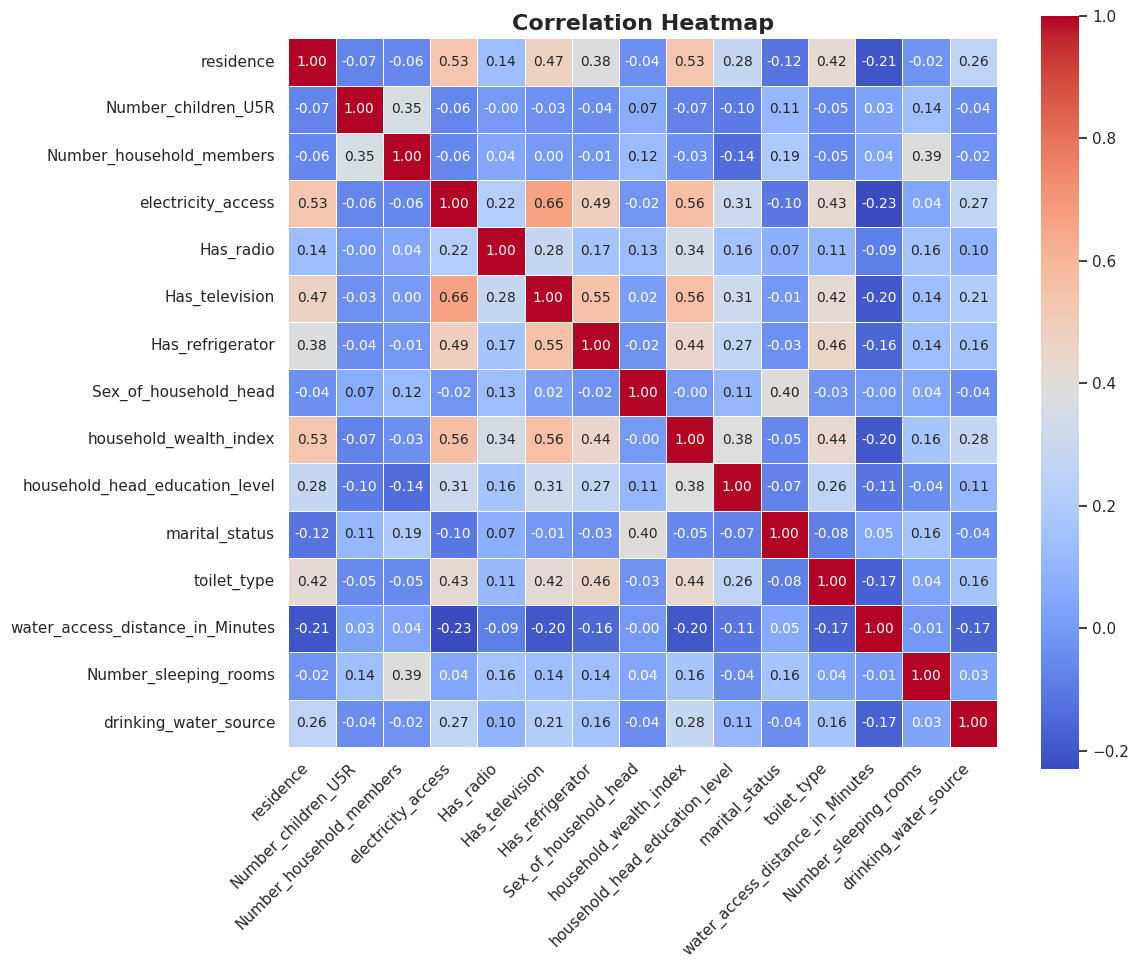

In [268]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_selected_for_model already exists
try:
    df = df_selected_for_model.copy()
except NameError:
    raise NameError("df_selected_for_model is not found. Please upload or define it.")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set style for publication
sns.set(style="white")  # clean white background

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # professional diverging palette
    cbar=True,
    square=True,
    linewidths=0.5,   # subtle gridlines
    annot_kws={"size":10}  # adjust font size for annotation
)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.title("Correlation Heatmap", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


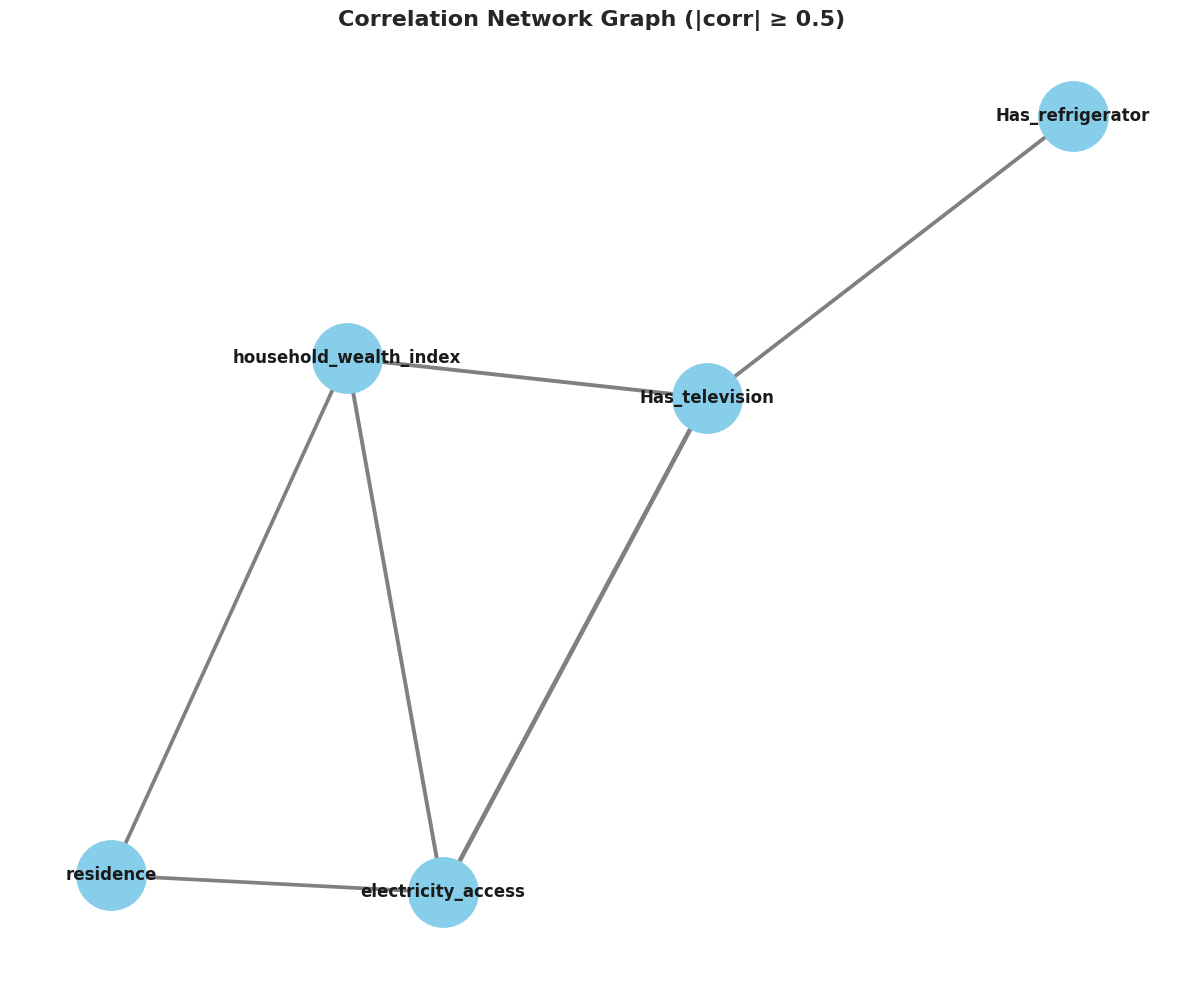

In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Assuming df_selected_for_model already exists
try:
    df = df_selected_for_model.copy()
except NameError:
    raise NameError("df_selected_for_model is not found. Please upload or define it.")

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Create graph
threshold = 0.5  # show only correlations above this absolute value
G = nx.Graph()

# Add edges for correlations above threshold
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) >= threshold:
            G.add_edge(i, j, weight=corr_matrix.loc[i, j])

# Draw network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=2500, node_color='skyblue')

# Draw edges with width proportional to correlation
edges = G.edges()
weights = [abs(G[u][v]['weight'])*5 for u, v in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')

# Add title
plt.title("Correlation Network Graph (|corr| ≥ 0.5)", fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [270]:
X = df_selected_for_model.drop('drinking_water_source', axis=1)
y = df_selected_for_model['drinking_water_source']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

Shape of X: (474302, 15)
Shape of y: (474302,)

First 5 rows of X:
       residence household_head_age  Number_children_U5R  \
16109          0                  1                    0   
16110          0                  1                    0   
16111          0                  1                    0   
16112          0                  2                    0   
16113          0                  3                    0   

       Number_household_members  electricity_access  Has_radio  \
16109                         0                   0          0   
16110                         1                   0          1   
16111                         1                   0          0   
16112                         1                   0          1   
16113                         0                   0          0   

       Has_television  Has_refrigerator  Sex_of_household_head  \
16109               0                 0                      1   
16110               0                 0    

In [271]:
print("Proportion of values in y (drinking_water_source):")
print(y.value_counts(normalize=True))

Proportion of values in y (drinking_water_source):
drinking_water_source
1    0.701346
0    0.298654
Name: proportion, dtype: float64


In [272]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nProportion of 'drinking_water_source' in y_train:")
print(y_train.value_counts(normalize=True))
print("\nProportion of 'drinking_water_source' in y_test:")
print(y_test.value_counts(normalize=True))

Shape of X_train: (379441, 15)
Shape of X_test: (94861, 15)
Shape of y_train: (379441,)
Shape of y_test: (94861,)

Proportion of 'drinking_water_source' in y_train:
drinking_water_source
1    0.701348
0    0.298652
Name: proportion, dtype: float64

Proportion of 'drinking_water_source' in y_test:
drinking_water_source
1    0.701342
0    0.298658
Name: proportion, dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Shape of original X_train: (379441, 15)
Shape of X_train after feature selection: (532240, 8)
Shape of original X_test: (94861, 15)
Shape of X_test after feature selection: (94861, 8)

Selected features:
['residence', 'household_head_age', 'electricity_access', 'Has_television', 'household_wealth_index', 'household_head_education_level', 'toilet_type', 'Number_sleeping_rooms']


/tmp/ipython-input-3855693177.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


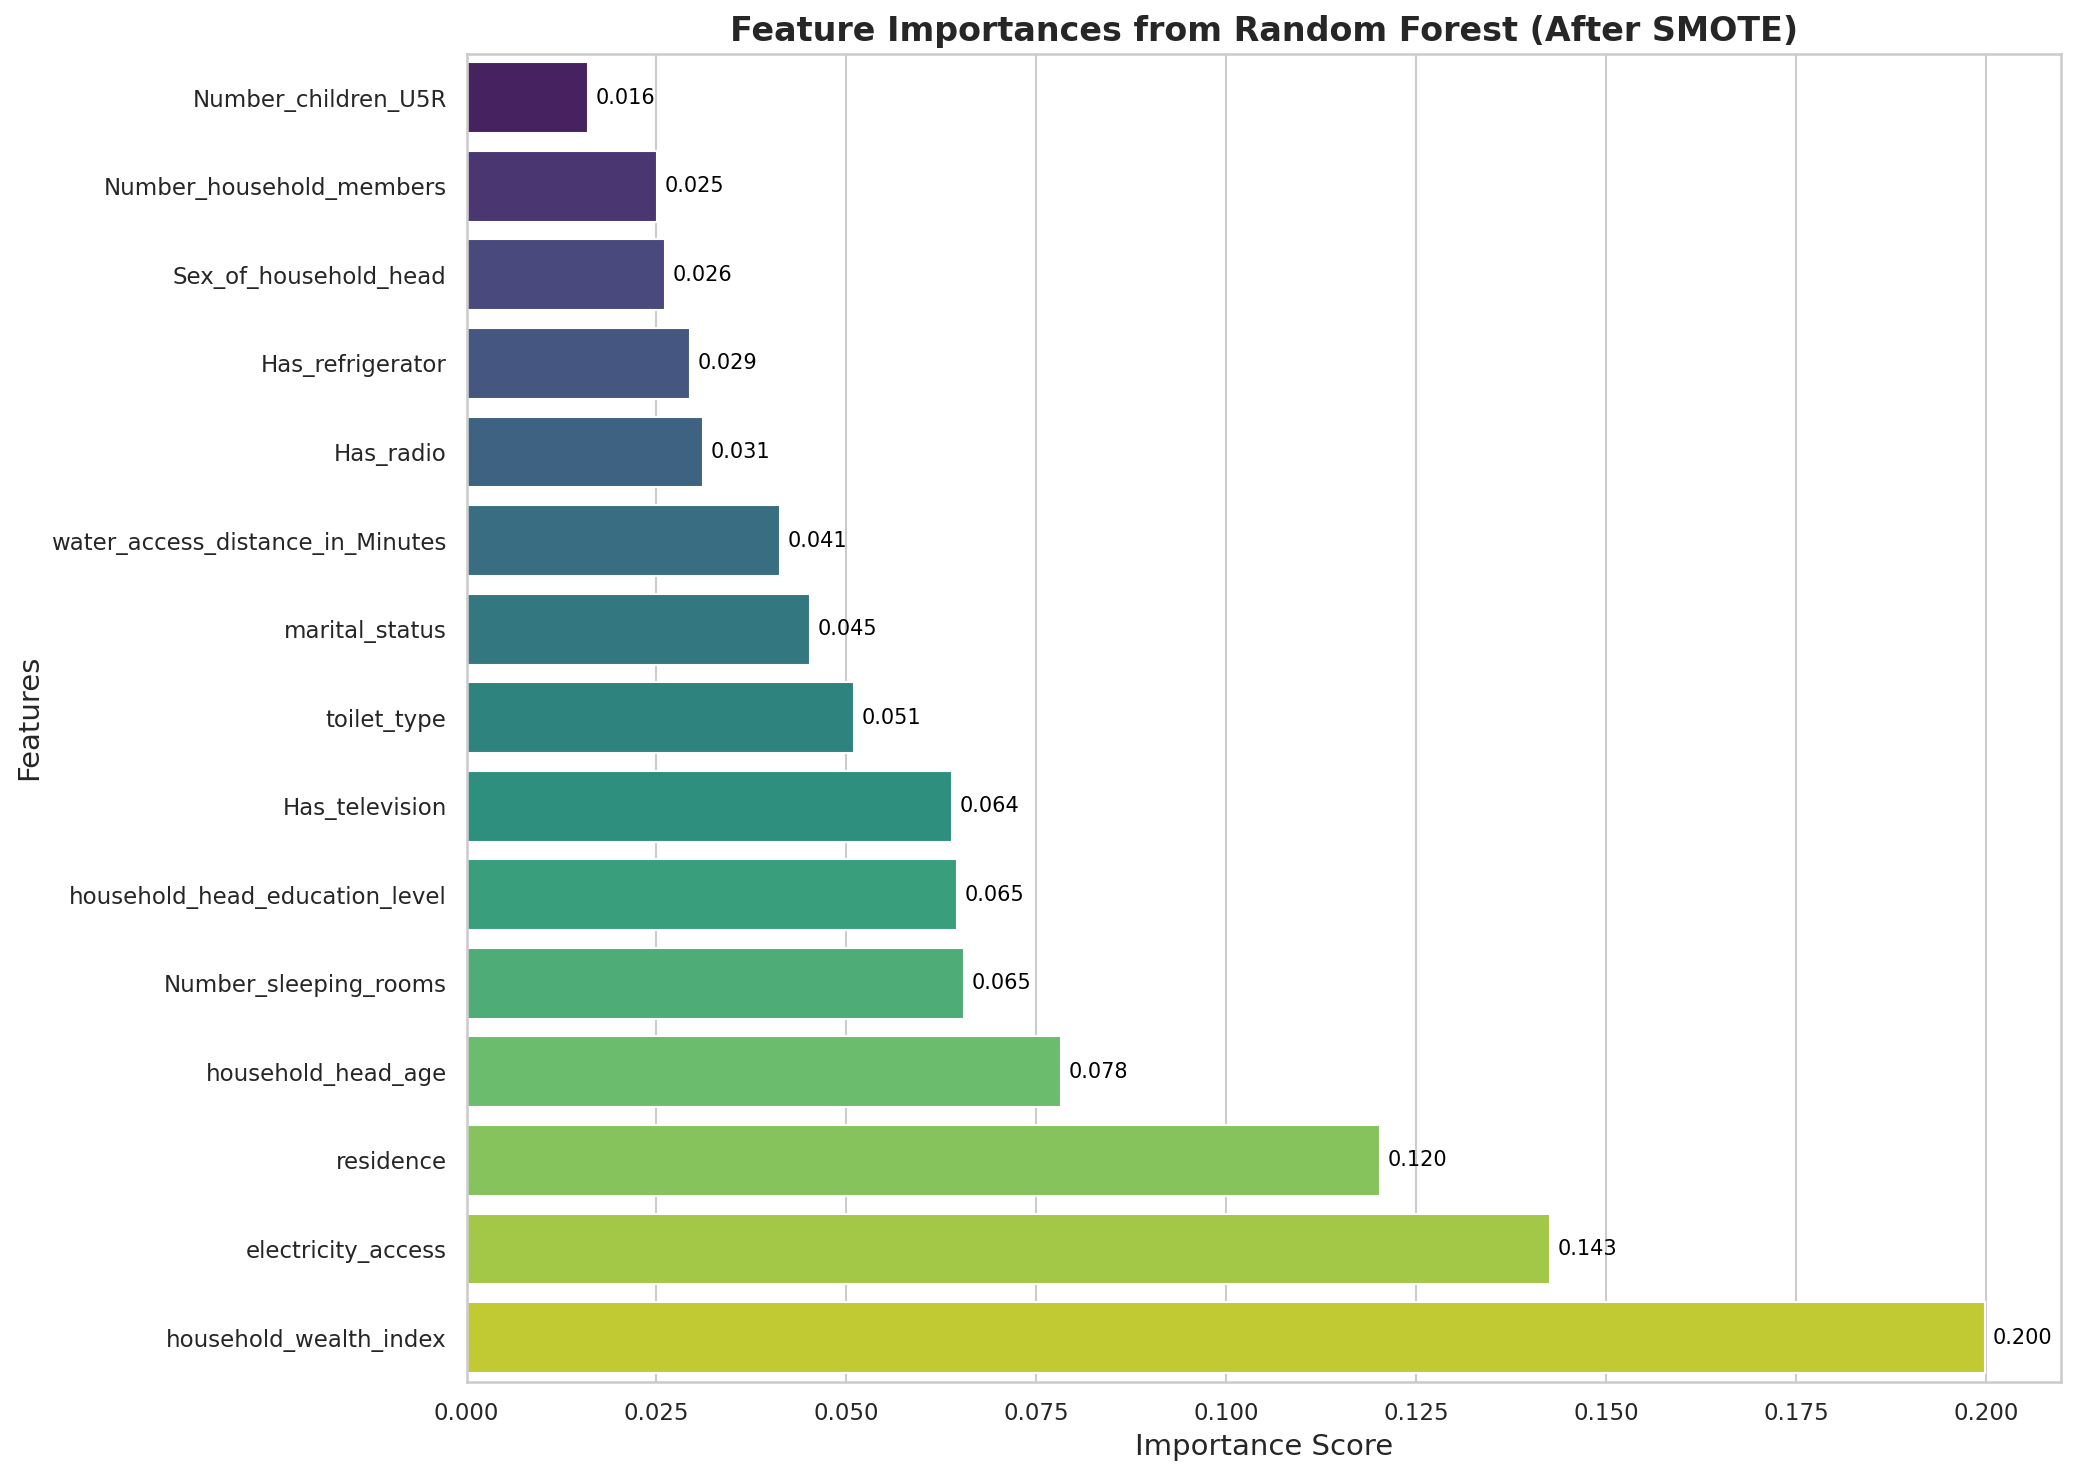

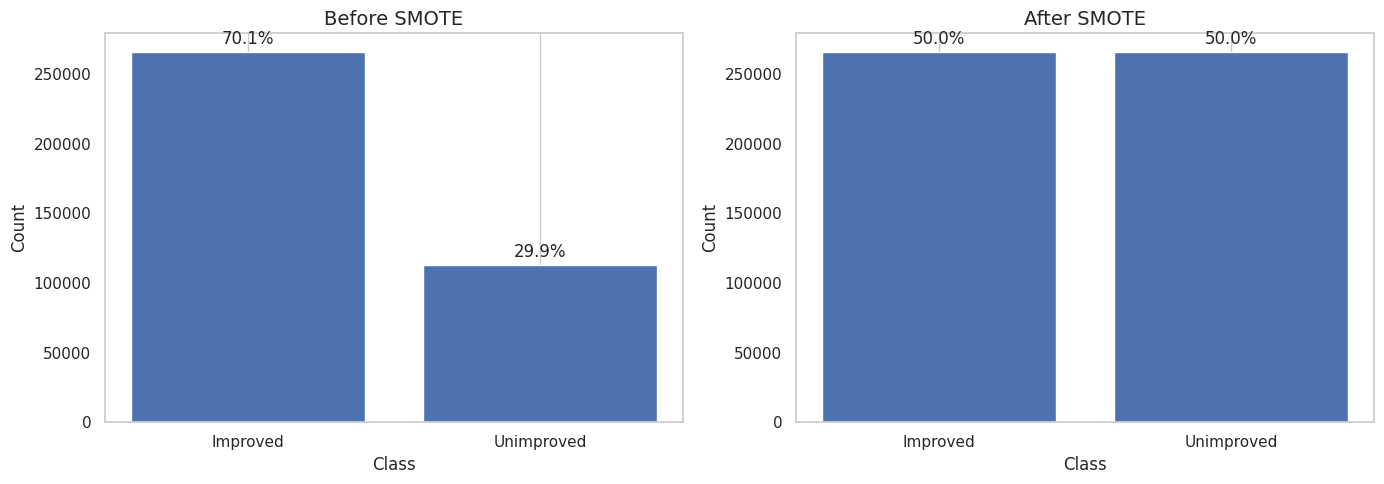

Class distribution BEFORE SMOTE:
drinking_water_source
Improved      266120
Unimproved    113321
Name: count, dtype: int64

Percentage BEFORE SMOTE:
drinking_water_source
Improved      70.13
Unimproved    29.87
Name: count, dtype: float64

Class distribution AFTER SMOTE:
drinking_water_source
Improved      266120
Unimproved    266120
Name: count, dtype: int64

Percentage AFTER SMOTE:
drinking_water_source
Improved      50.0
Unimproved    50.0
Name: count, dtype: float64


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from imblearn.over_sampling import SMOTE

# ------------------------------------------
# Rename labels for display
# ------------------------------------------
label_map = {1: "Improved", 0: "Unimproved"}
y_train_named = y_train.map(label_map)

# ------------------------------------------
# APPLY SMOTE
# ------------------------------------------
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
y_train_res_named = y_train_res.map(label_map)

# ------------------------------------------
# TRAIN RANDOM FOREST ON RESAMPLED DATA
# ------------------------------------------
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_res, y_train_res)

# ------------------------------------------
# FEATURE SELECTION
# ------------------------------------------
selector = SelectFromModel(rf_classifier, prefit=True, threshold='median')
X_train_selected = selector.transform(X_train_res)
X_test_selected = selector.transform(X_test)

selected_features = X_train.columns[selector.get_support()]

print("Shape of original X_train:", X_train.shape)
print("Shape of X_train after feature selection:", X_train_selected.shape)
print("Shape of original X_test:", X_test.shape)
print("Shape of X_test after feature selection:", X_test_selected.shape)
print("\nSelected features:")
print(list(selected_features))

# ------------------------------------------
# FEATURE IMPORTANCE PLOT
# ------------------------------------------
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
sorted_feature_importances = feature_importances.sort_values(ascending=True)

plt.figure(figsize=(14, 10), dpi=150)
sns.set_style("whitegrid")

ax = sns.barplot(
    x=sorted_feature_importances.values,
    y=sorted_feature_importances.index,
    palette='viridis'
)

# Add data labels
for i, v in enumerate(sorted_feature_importances.values):
    ax.text(v + 0.001, i, f"{v:.3f}", color='black', va='center', fontsize=10)

plt.title('Feature Importances from Random Forest (After SMOTE)', fontsize=16, weight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# ------------------------------------------
# OPTIONAL: Visualize class distribution before and after SMOTE
# ------------------------------------------
before_counts = y_train_named.value_counts()
after_counts = y_train_res_named.value_counts()
before_props = (before_counts / before_counts.sum()) * 100
after_props = (after_counts / after_counts.sum()) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# BEFORE SMOTE
axes[0].bar(before_counts.index, before_counts.values)
axes[0].set_title("Before SMOTE", fontsize=14)
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].grid(axis='y')
for i, v in enumerate(before_counts.values):
    axes[0].text(i, v + max(before_counts.values)*0.02, f"{before_props.iloc[i]:.1f}%", ha='center', fontsize=12)

# AFTER SMOTE
axes[1].bar(after_counts.index, after_counts.values)
axes[1].set_title("After SMOTE", fontsize=14)
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].grid(axis='y')
for i, v in enumerate(after_counts.values):
    axes[1].text(i, v + max(after_counts.values)*0.02, f"{after_props.iloc[i]:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# Print distributions
print("Class distribution BEFORE SMOTE:")
print(before_counts)
print("\nPercentage BEFORE SMOTE:")
print(before_props.round(2))
print("\nClass distribution AFTER SMOTE:")
print(after_counts)
print("\nPercentage AFTER SMOTE:")
print(after_props.round(2))


In [274]:
X_train.columns

Index(['residence', 'household_head_age', 'Number_children_U5R',
       'Number_household_members', 'electricity_access', 'Has_radio',
       'Has_television', 'Has_refrigerator', 'Sex_of_household_head',
       'household_wealth_index', 'household_head_education_level',
       'marital_status', 'toilet_type', 'water_access_distance_in_Minutes',
       'Number_sleeping_rooms'],
      dtype='object')

In [275]:
!pip install catboost

from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# ------------------------------------------
# Initialize models (without class_weight since SMOTE handles imbalance)
# ------------------------------------------
models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=200, random_state=42
    ),
    "ExtraTrees": ExtraTreesClassifier(
        n_estimators=200, random_state=42
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=300, random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=300, learning_rate=0.05, random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42,
        use_label_encoder=False
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=300,
        learning_rate=0.05,
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        learning_rate=0.05,
        depth=6,
        loss_function="Logloss",
        verbose=0,
        random_seed=42
    )
}

# ------------------------------------------
# Train & Evaluate on SMOTE-resampled data
# ------------------------------------------
results = {}

for name, model in models.items():
    print(f"\n------------ Training {name} ------------")
    model.fit(X_train_selected, y_train_res)  # train on resampled data
    y_pred = model.predict(X_test_selected)   # test on original test set

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# ------------------------------------------
# Summary Table
# ------------------------------------------
results_df = pd.DataFrame(results.items(), columns=["Model", "Accuracy"])
print("\n\n===== MODEL PERFORMANCE SUMMARY =====")
print(results_df.sort_values(by="Accuracy", ascending=False))



------------ Training RandomForest ------------
Accuracy: 0.6473
              precision    recall  f1-score   support

           0       0.44      0.73      0.55     28331
           1       0.84      0.61      0.71     66530

    accuracy                           0.65     94861
   macro avg       0.64      0.67      0.63     94861
weighted avg       0.72      0.65      0.66     94861


------------ Training ExtraTrees ------------
Accuracy: 0.6468
              precision    recall  f1-score   support

           0       0.44      0.73      0.55     28331
           1       0.84      0.61      0.71     66530

    accuracy                           0.65     94861
   macro avg       0.64      0.67      0.63     94861
weighted avg       0.72      0.65      0.66     94861


------------ Training AdaBoost ------------
Accuracy: 0.6338
              precision    recall  f1-score   support

           0       0.43      0.74      0.55     28331
           1       0.84      0.59      0.69  

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [12:47:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6519
              precision    recall  f1-score   support

           0       0.45      0.73      0.56     28331
           1       0.84      0.62      0.71     66530

    accuracy                           0.65     94861
   macro avg       0.65      0.67      0.63     94861
weighted avg       0.72      0.65      0.67     94861


------------ Training LightGBM ------------
[LightGBM] [Info] Number of positive: 266120, number of negative: 266120
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 532240, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.6518
              precision    recall  f1-score   support

           0       0.45      0.73      0.56     28331
           1       0.84      0.62      0.71     66530

    accuracy                           0.65     94861
   macro avg       0.65      0.67      0.63     94861
weighted avg       0.73      0.65      0.67     94861


------------ Training CatBoost ------------
Accuracy: 0.6509
              precision    recall  f1-score   support

           0       0.45      0.73      0.56     28331
           1       0.84      0.62      0.71     66530

    accuracy                           0.65     94861
   macro avg       0.65      0.67      0.63     94861
weighted avg       0.73      0.65      0.67     94861



===== MODEL PERFORMANCE SUMMARY =====
              Model  Accuracy
3  GradientBoosting  0.654526
4           XGBoost  0.651901
5          LightGBM  0.651838
6          CatBoost  0.650868
0      RandomForest  0.647273
1        ExtraTrees  0.646820
2          AdaBoo

In [ ]:
!pip install optuna

import optuna
from optuna import Trial
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Define objective functions with pruning
# -----------------------------
def objective_rf(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42
    }
    model = RandomForestClassifier(**params)

    # Fit model with pruning callback
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)

    # Report intermediate value for pruning
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return acc

def objective_et(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42
    }
    model = ExtraTreesClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_ada(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5)
    }
    model = AdaBoostClassifier(**params, random_state=42)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_gbm(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 6)
    }
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_xgb(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_lgbm(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "random_state": 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_cat(trial: Trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 3, 6),
        "random_seed": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

# -----------------------------
# Models and objectives
# -----------------------------
objectives = {
    "RandomForest": objective_rf,
    "ExtraTrees": objective_et,
    "AdaBoost": objective_ada,
    "GradientBoosting": objective_gbm,
    "XGBoost": objective_xgb,
    "LightGBM": objective_lgbm,
    "CatBoost": objective_cat
}

best_models = {}
n_trials_fast = 10  # Reduced trials for speed

# Use pruning-enabled sampler
sampler = optuna.samplers.TPESampler(n_startup_trials=3)

for name, obj in objectives.items():
    print(f"\nOptimizing {name} with Optuna (Fast Mode + Pruning)...")
    study = optuna.create_study(direction="maximize", sampler=sampler, pruner=optuna.pruners.MedianPruner(n_warmup_steps=2))
    study.optimize(obj, n_trials=n_trials_fast, show_progress_bar=True)

    print(f"Best accuracy for {name}: {study.best_value:.4f}")
    best_params = study.best_params

    # Re-train best model on SMOTE-resampled data
    if name == "RandomForest":
        best_model = RandomForestClassifier(**best_params, random_state=42)
    elif name == "ExtraTrees":
        best_model = ExtraTreesClassifier(**best_params, random_state=42)
    elif name == "AdaBoost":
        best_model = AdaBoostClassifier(**best_params, random_state=42)
    elif name == "GradientBoosting":
        best_model = GradientBoostingClassifier(**best_params, random_state=42)
    elif name == "XGBoost":
        best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    elif name == "LightGBM":
        best_model = LGBMClassifier(**best_params, random_state=42)
    elif name == "CatBoost":
        best_model = CatBoostClassifier(**best_params, verbose=0, random_seed=42)

    best_model.fit(X_train_selected, y_train_res)
    best_models[name] = best_model

# -----------------------------
# Evaluate all models (same as before)
# -----------------------------
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "ROC_AUC": []}

plt.figure(figsize=(10,8))
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:,1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1"].append(f1)
    metrics["ROC_AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models (SMOTE + Optuna Fast + Pruning)")
plt.legend()
plt.show()

metrics_df = pd.DataFrame(metrics).sort_values(by="Accuracy", ascending=False)
print("\n===== Evaluation Metrics Summary =====")
print(metrics_df)


[I 2025-11-15 12:48:58,581] A new study created in memory with name: no-name-ce72f26a-4b28-4e12-8fd2-0062185fa510



Optimizing RandomForest with Optuna (Fast Mode + Pruning)...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-15 12:50:03,345] Trial 0 finished with value: 0.6489600573470657 and parameters: {'n_estimators': 157, 'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.6489600573470657.
[I 2025-11-15 12:50:32,988] Trial 1 finished with value: 0.6542098438768303 and parameters: {'n_estimators': 117, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.6542098438768303.
[I 2025-11-15 12:51:28,628] Trial 2 finished with value: 0.6504780679098892 and parameters: {'n_estimators': 175, 'max_depth': 11, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.6542098438768303.
[I 2025-11-15 12:51:43,831] Trial 3 finished with value: 0.6353085040216738 and parameters: {'n_estimators': 104, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6542098438768303.
[I 2025-11-15 12:52:42,746] Trial 4 finished with value: 0.654325803017046 and parameters: {'n

[I 2025-11-15 12:58:46,939] A new study created in memory with name: no-name-5a366f5f-026c-4e0e-b88f-4cce2dca2af7



Optimizing ExtraTrees with Optuna (Fast Mode + Pruning)...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-15 12:59:27,584] Trial 0 finished with value: 0.6438051464774776 and parameters: {'n_estimators': 263, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.6438051464774776.
[I 2025-11-15 13:00:11,701] Trial 1 finished with value: 0.6523966645934578 and parameters: {'n_estimators': 219, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6523966645934578.
[I 2025-11-15 13:00:53,357] Trial 2 finished with value: 0.648443512086105 and parameters: {'n_estimators': 238, 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 1 with value: 0.6523966645934578.
[I 2025-11-15 13:01:24,737] Trial 3 finished with value: 0.6492868512876735 and parameters: {'n_estimators': 120, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 1 with value: 0.6523966645934578.
[I 2025-11-15 13:02:02,730] Trial 4 finished with value: 0.6514373662516735 and parameters: {'n_

[I 2025-11-15 13:05:18,595] A new study created in memory with name: no-name-1cd24244-16f4-461a-8782-a2c487feb75e



Optimizing AdaBoost with Optuna (Fast Mode + Pruning)...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-15 13:05:42,330] Trial 0 finished with value: 0.6270226963662622 and parameters: {'n_estimators': 123, 'learning_rate': 0.08495183519079656}. Best is trial 0 with value: 0.6270226963662622.
[I 2025-11-15 13:06:04,835] Trial 1 finished with value: 0.6335902003984778 and parameters: {'n_estimators': 125, 'learning_rate': 0.37069419146095095}. Best is trial 1 with value: 0.6335902003984778.
[I 2025-11-15 13:06:27,144] Trial 2 finished with value: 0.6330525716574777 and parameters: {'n_estimators': 107, 'learning_rate': 0.4762357766004592}. Best is trial 1 with value: 0.6335902003984778.
[I 2025-11-15 13:07:03,993] Trial 3 finished with value: 0.6333371986380072 and parameters: {'n_estimators': 197, 'learning_rate': 0.37524186666611986}. Best is trial 1 with value: 0.6335902003984778.
[I 2025-11-15 13:07:13,192] Trial 4 finished with value: 0.6259052719241838 and parameters: {'n_estimators': 54, 'learning_rate': 0.24215963588839753}. Best is trial 1 with value: 0.633590200398477

[I 2025-11-15 13:10:05,057] A new study created in memory with name: no-name-8b4ee00b-5273-492b-b587-3ad980f3ff0a



Optimizing GradientBoosting with Optuna (Fast Mode + Pruning)...


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-11-15 13:11:02,193] Trial 0 finished with value: 0.6525758741737911 and parameters: {'n_estimators': 108, 'learning_rate': 0.18165540505117322, 'max_depth': 4}. Best is trial 0 with value: 0.6525758741737911.
[I 2025-11-15 13:12:10,443] Trial 1 finished with value: 0.6514373662516735 and parameters: {'n_estimators': 135, 'learning_rate': 0.11295912040254402, 'max_depth': 4}. Best is trial 0 with value: 0.6525758741737911.
[I 2025-11-15 13:13:04,848] Trial 2 finished with value: 0.6537460073159675 and parameters: {'n_estimators': 86, 'learning_rate': 0.05806580950878847, 'max_depth': 5}. Best is trial 2 with value: 0.6537460073159675.
[I 2025-11-15 13:13:48,754] Trial 3 finished with value: 0.6546315134776146 and parameters: {'n_estimators': 50, 'learning_rate': 0.011678890570869987, 'max_depth': 6}. Best is trial 3 with value: 0.6546315134776146.


In [ ]:
!pip install optuna

import optuna
from optuna import Trial
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Define objective functions with pruning
# -----------------------------
def objective_rf(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42
    }
    model = RandomForestClassifier(**params)

    # Fit model with pruning callback
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)

    # Report intermediate value for pruning
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return acc

def objective_et(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 8),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4),
        "random_state": 42
    }
    model = ExtraTreesClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_ada(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.5)
    }
    model = AdaBoostClassifier(**params, random_state=42)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_gbm(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 6)
    }
    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_xgb(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 6),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "use_label_encoder": False,
        "eval_metric": "logloss",
        "random_state": 42
    }
    model = XGBClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_lgbm(trial: Trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "random_state": 42
    }
    model = LGBMClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

def objective_cat(trial: Trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 200),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "depth": trial.suggest_int("depth", 3, 6),
        "random_seed": 42,
        "verbose": 0
    }
    model = CatBoostClassifier(**params)
    model.fit(X_train_selected, y_train_res)
    preds = model.predict(X_test_selected)
    acc = accuracy_score(y_test, preds)
    trial.report(acc, step=0)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    return acc

# -----------------------------
# Models and objectives
# -----------------------------
objectives = {
    "RandomForest": objective_rf,
    "ExtraTrees": objective_et,
    "AdaBoost": objective_ada,
    "GradientBoosting": objective_gbm,
    "XGBoost": objective_xgb,
    "LightGBM": objective_lgbm,
    "CatBoost": objective_cat
}

best_models = {}
n_trials_fast = 10  # Reduced trials for speed

# Use pruning-enabled sampler
sampler = optuna.samplers.TPESampler(n_startup_trials=3)

for name, obj in objectives.items():
    print(f"\nOptimizing {name} with Optuna (Fast Mode + Pruning)...")
    study = optuna.create_study(direction="maximize", sampler=sampler, pruner=optuna.pruners.MedianPruner(n_warmup_steps=2))
    study.optimize(obj, n_trials=n_trials_fast, show_progress_bar=True)

    print(f"Best accuracy for {name}: {study.best_value:.4f}")
    best_params = study.best_params

    # Re-train best model on SMOTE-resampled data
    if name == "RandomForest":
        best_model = RandomForestClassifier(**best_params, random_state=42)
    elif name == "ExtraTrees":
        best_model = ExtraTreesClassifier(**best_params, random_state=42)
    elif name == "AdaBoost":
        best_model = AdaBoostClassifier(**best_params, random_state=42)
    elif name == "GradientBoosting":
        best_model = GradientBoostingClassifier(**best_params, random_state=42)
    elif name == "XGBoost":
        best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)
    elif name == "LightGBM":
        best_model = LGBMClassifier(**best_params, random_state=42)
    elif name == "CatBoost":
        best_model = CatBoostClassifier(**best_params, verbose=0, random_seed=42)

    best_model.fit(X_train_selected, y_train_res)
    best_models[name] = best_model

# -----------------------------
# Evaluate all models (same as before)
# -----------------------------
metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "ROC_AUC": []}

plt.figure(figsize=(10,8))
for name, model in best_models.items():
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:,1] if hasattr(model, "predict_proba") else y_pred

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    metrics["Model"].append(name)
    metrics["Accuracy"].append(acc)
    metrics["Precision"].append(prec)
    metrics["Recall"].append(rec)
    metrics["F1"].append(f1)
    metrics["ROC_AUC"].append(roc)

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for All Models (SMOTE + Optuna Fast + Pruning)")
plt.legend()
plt.show()

metrics_df = pd.DataFrame(metrics).sort_values(by="Accuracy", ascending=False)
print("\n===== Evaluation Metrics Summary =====")
print(metrics_df)
